

# Power Production Project for *Fundamentals of Data Analysis* at GMIT
by Radek Wojtczak G00352936<br>


**Instructions:**

>In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.
Your submission must be in the form of a git repository containing, at a minimum, the
following items:
>1. Jupyter notebook that performs simple linear regression on the data set.
>2. In that notebook, an explanation of your regression and an analysis of its accuracy.
>3. Standard items in a git repository such as a README.

>To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set.


# Wind power



**How does a wind turbine work?**

Wind turbines can turn the power of wind into the electricity we all use to power our homes and businesses. They can be stand-alone, supplying just one or a very small number of homes or businesses, or they can be clustered to form part of a wind farm. 

The visible parts of the wind farm that we’re all used to seeing – those towering white or pale grey turbines. Each of these turbines consists of a set of blades, a box beside them called a nacelle and a shaft. The wind – and this can be just a gentle breeze – makes the blades spin, creating kinetic energy. The blades rotating in this way then also make the shaft in the nacelle turn and a generator in the nacelle converts this kinetic energy into electrical energy.

![How it works](img/works.jpg) 

**What happens to the wind-turbine generated electricity next?**

To connect to the national grid, the electrical energy is then passed through a transformer on the site that increases the voltage to that used by the national electricity system. It’s at this stage that the electricity usually moves onto the National Grid transmission network, ready to then be passed on so that, eventually, it can be used in homes and businesses. Alternatively, a wind farm or a single wind turbine can generate electricity that is used privately by an individual or small set of homes or businesses.
 

**How strong does the wind need to be for a wind turbine to work?**

Wind turbines can operate in anything from very light to very strong wind speeds. They generate around 80% of the time, but not always at full capacity. In really high winds they shut down to prevent damage.

![Frequency](img/freq.png)

**Where are wind farms located?**

Wind farms tend to be located in the windiest places possible, to maximise the energy they can create – this is why you’ll be more likely to see them on hillsides or at the coast. Wind farms that are in the sea are called offshore wind farms, whereas those on dry land are termed onshore wind farms.

**Wind energy in Ireland**

Wind energy is currently the largest contributing resource of renewable energy in Ireland. It is both Ireland’s largest and cheapest renewable electricity resource. In 2018 Wind provided 85% of Ireland’s renewable electricity and 30% of our total electricity demand. It is the second greatest source of electricity generation in Ireland after natural gas. Ireland is one of the leading countries in its use of wind energy and 3rd place worldwide in 2018, after Denmark and Uruguay.

![Windfarms in Ireland](img/map.jpg)

### Exploring dataset:

In [1]:
# importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as seabornInstance 


In [2]:
# loading our dataset, seting columns names and changing index to start from 1 instead of 0
df = pd.read_csv('dataset/powerproduction.txt', sep=",", header=None)
df.columns = ["speed", "power"]
df = df[1:]
df

,speed,power
1,0.000,0.000
2,0.125,0.000
3,0.150,0.000
4,0.225,0.000
5,0.275,0.000
...,...,...
496,24.775,0.000
497,24.850,0.000
498,24.875,0.000
499,24.950,0.000


In [3]:
# checking for nan values
count_nan = len(df) - df.count()
count_nan

speed    0
power    0
dtype: int64

In [4]:
# Converting Strings to Floats
df = df.astype(float)

In [5]:
# showing first 20 results
df.head(20)

,speed,power
1,0.000,0.000
2,0.125,0.000
3,0.150,0.000
4,0.225,0.000
5,0.275,0.000
6,0.325,4.331
7,0.400,5.186
8,0.450,3.826
9,0.501,1.048
10,0.526,5.553


In [6]:
# basic statistic of speed column
df['speed'].describe()

count    500.000000
mean      12.590398
std        7.224991
min        0.000000
25%        6.324750
50%       12.550500
75%       18.775250
max       25.000000
Name: speed, dtype: float64

In [7]:
# basic statistic of power column
df['power'].describe()

count    500.000000
mean      48.014584
std       41.614572
min        0.000000
25%        5.288000
50%       41.645500
75%       93.537000
max      113.556000
Name: power, dtype: float64

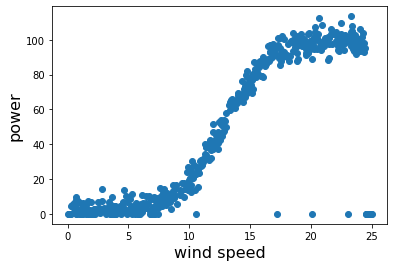

In [8]:
# scatter plot of our dataset
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(df['speed'],df['power'])
plt.show()

## Regression

The term regression is used when you try to find the relationship between variables.

In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

## Linear Regression

The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

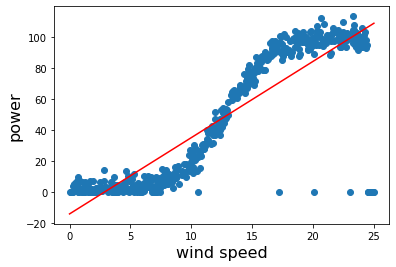

In [9]:
x = df['speed']
y = df['power']

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 25, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x, y)
plt.plot(xfit, yfit, color="red");

In [10]:
print("Parameters:", model.coef_, model.intercept_)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Parameters: [4.91759567] -13.899902630519634
Model slope:     4.9175956654046695
Model intercept: -13.899902630519634


**Different approach: Simple linear regression model**

Training a data with 30% for test.

In [11]:
x_train,x_test,y_train,y_test = train_test_split(df[['speed']],df.power,test_size = 0.3)

Simple linear regression model

In [12]:
reg_simple = lm.LinearRegression()
reg_simple.fit(x_train,y_train)

LinearRegression()

Best fit line on test dataset with simple linear regression

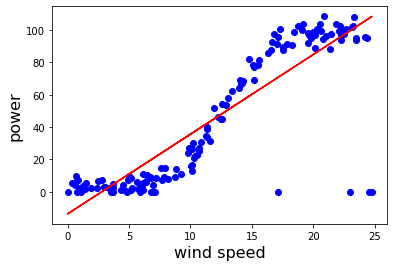

In [13]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_simple.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [14]:
reg_simple.coef_ #slope

array([4.92457845])

In [15]:
reg_simple.intercept_ #y-intercept

-13.644691488093514

In [16]:
reg_simple.score(x_test,y_test)

0.748218388024039

## Ridge regression and classification

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

In [17]:
reg_ridge = lm.Ridge(alpha=.5)
reg_ridge.fit(x_train,y_train)

Ridge(alpha=0.5)

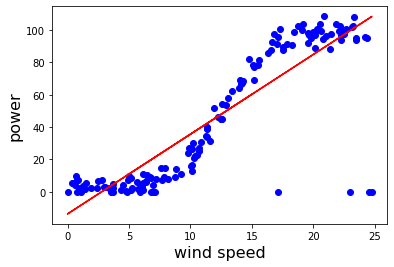

In [18]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_ridge.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [19]:
reg_ridge.coef_ #slope

array([4.92444203])

In [20]:
reg_ridge.intercept_ #y-intercept

-13.642927890065017

In [21]:
reg_ridge.score(x_test,y_test)

0.7482185224585383

**With regularization parameter.**

In [22]:
reg_ridgecv = lm.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg_ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

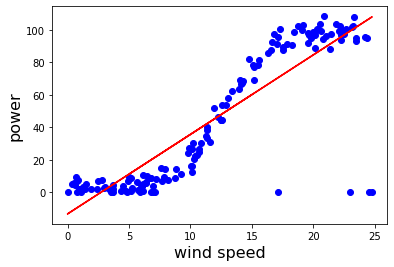

In [23]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_ridgecv.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [24]:
reg_ridgecv.coef_ #slope

array([4.89744436])

In [25]:
reg_ridgecv.intercept_ #y-intercept

-13.29390562548128

In [26]:
reg_ridgecv.score(x_test,y_test)

0.7482215711972642